# LDLF demo
In this demo I'll show some properties of Label Distribution Learning Forest including a **Facial Age Estimation** example.

In [1]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
import os, sys
from os.path import join, split, splitext, abspath, dirname
sys.path.append('caffe-ldl/python/')
import caffe
from PIL import Image

In [2]:
caffe.set_mode_gpu()
caffe.set_device(0)
net = caffe.Net('experiments/age-net-bn/tmp/Morph-deploy-ratio0.6.prototxt', \
          'experiments/age-net-bn/Morph-Ratio0.6_iter_10000.caffemodel', \
           caffe.TEST)

## Visualize leafnode distributions. We expect them to be normal distribution or at least have peaks

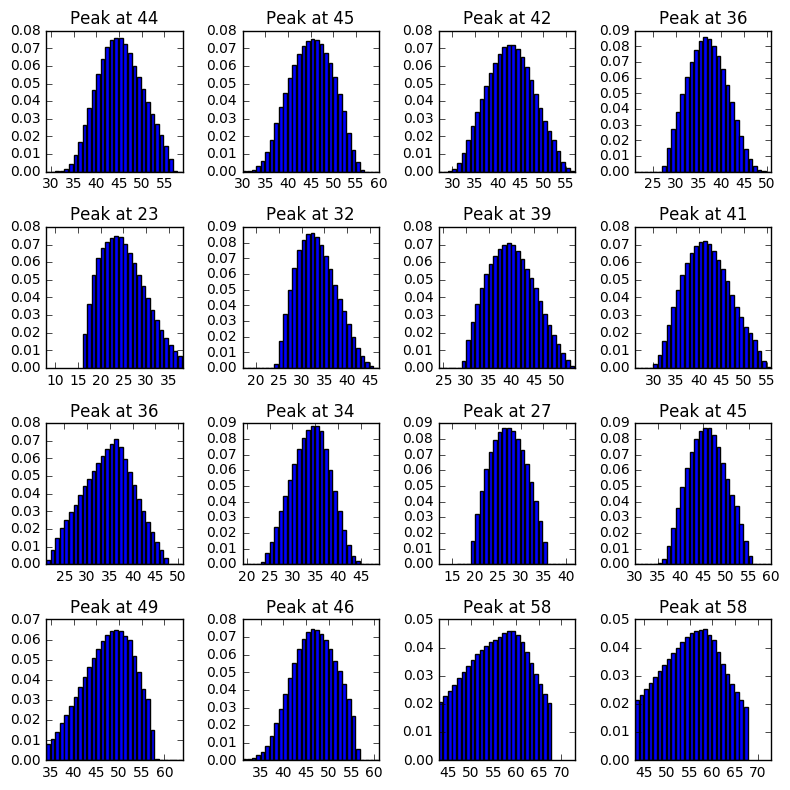

In [3]:
distr = net.params['probloss'][0].data[...]
fig, axarr = plt.subplots(4,4)
fig.set_figheight(8)
fig.set_figwidth(8)
for i in range(4):
    for j in range(4):
        ax = axarr[i,j]
        ax.bar(np.arange(16,68), np.squeeze(distr[0,i*8+j,:,0]), color='b')
        peak_idx = np.argmax(np.squeeze(distr[0,i*8+j,:,0])) + 16
        ax.set_title("Peak at %d"%peak_idx)
        ax.set_xlim([peak_idx - 15, peak_idx + 15])
fig.tight_layout()

In [4]:
im = Image.open('317060_02M26.JPG').resize((256,256))

In [5]:
def process_im(im):
    data = np.array(im, dtype=np.float32)
    data = data[:,:,::-1] - 112
    data = np.transpose(data, (2,0,1))
    return data
data = process_im(im)
net.blobs['data'].reshape(1, *data.shape)
net.blobs['data'].data[...] = data
pred = net.forward()['pred']

## Visualize the image and predicted distribution

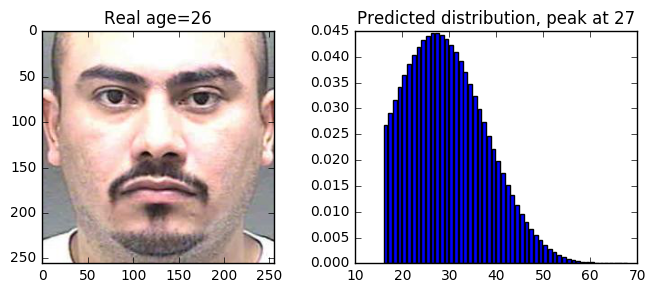

In [6]:
age_range = np.arange(16,68)
fig = plt.figure(figsize=(8, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[1, 1], height_ratios=[1,1])
ax0 = plt.subplot(gs[0])
ax0.imshow(im)
ax0.set_title("Real age=26")
ax1 = plt.subplot(gs[1])
ax1.bar(age_range, pred[0,:,0,0])
ax1.set_title("Predicted distribution, peak at %d"%(np.argmax(pred[0,:,0,0]) + 16))